# Project 1.1: Understanding linear models on synthetic data

```
From ML Theory to Practice
Universität Potsdam, fall semester 2025

Authors: Juan L. Gamella and Simon Bing
License: CC-BY-4.0 https://creativecommons.org/licenses/by/4.0/
```

## Imports

These packages should already be installed in your Python virtual environment.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

## Generating synthetic data

<mark style="background-color: #40E0D0;"> Task </mark> 

Write code to generate `N` samples from the following linear model

$Y := \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + \epsilon$

where $\beta \in \mathbb{R}^4$ and $\epsilon \sim \mathcal{N}(0,1)$, and $X_1$, $X_2$, $X_3$ are sampled independently and uniformly at random from $[0,10]$.

For now, set $\beta = (0,1,2,3)$, `N = 100` and store the samples in a dataframe with columns `X0, X1, X2, X3, Y`, where `X0` is just a vector of ones.

In [4]:
true_coefficients = np.array([0,1,2,3])
def generate_dataset(N, seed, model_coefficients = true_coefficients):
    rng = np.random.default_rng(seed)
    # TODO: your code goes here

    X0=np.ones(N)
    X1=np.random.random(N)*10
    X2=np.random.random(N)*10
    X3=np.random.random(N)*10
    
    eps=np.random.normal(0,1,N)
    
    #Y=X0*0+X1*1+X2*2+X3*3+eps
    Y=np.column_stack([X0, X1, X2, X3]) @ true_coefficients+eps
    # Store in a dataframe    
    data = pd.DataFrame({'X0': X0, 'X1': X1, 'X2': X2, 'X3': X3, 'Y': Y})
    return data

In [5]:
data = generate_dataset(N=100, seed=42)

## Visualize the data

<mark style="background-color: #40E0D0;"> Task </mark> 

Before fitting a model, lets do a sanity check on the data. Make a corner plot using [`sns.pairplot`](https://seaborn.pydata.org/generated/seaborn.pairplot.html), and specify `vars=['X1', 'X2', 'X3', 'Y']` and `corner=True`. Look at the row for `Y` vs. the other variables and check that there is indeed the linear effect you expect.

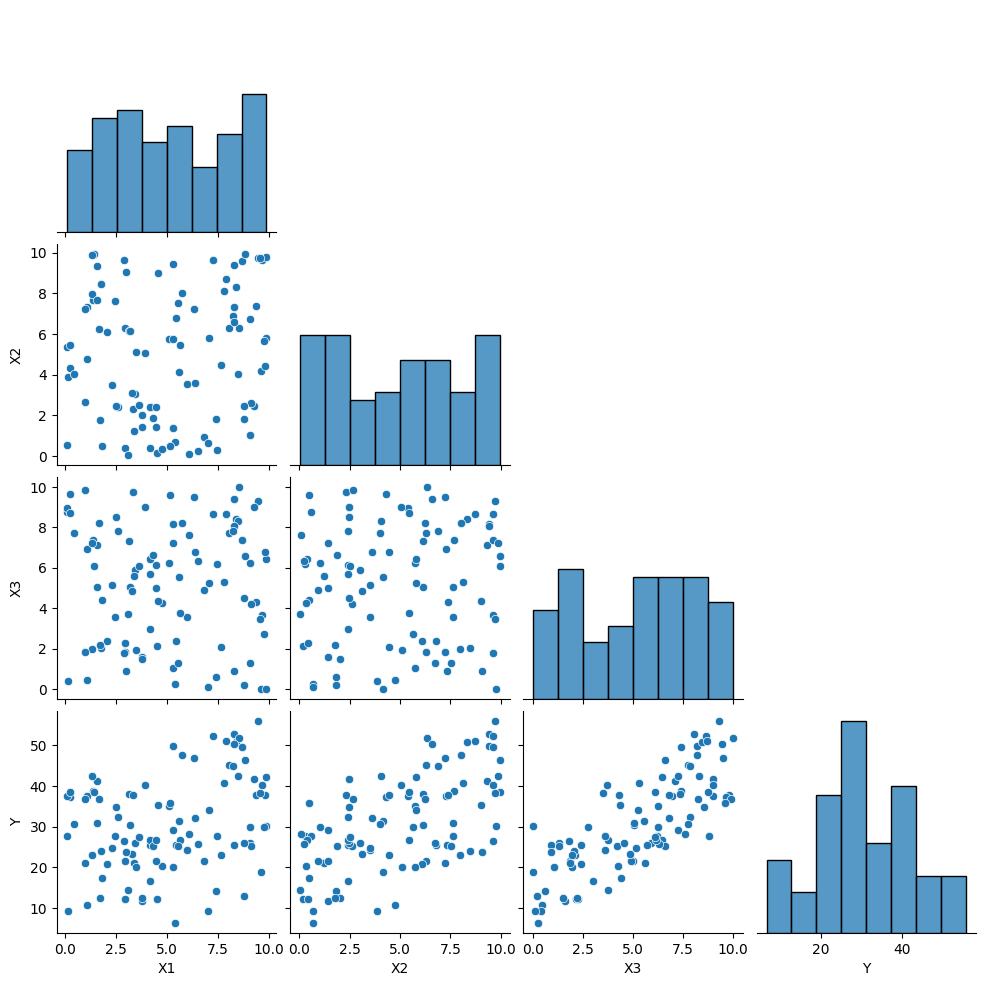

In [43]:
# TODO: your code goes here
sns.pairplot(data,vars=["X1", "X2","X3","Y"],corner=True)

<mark style="background-color: #648fff;">Question:</mark> Write down anything that surprises you to discuss later with your classmates.

The correlation between X3 and Y is much stronger compared to the one between X1, X2 and X1,X3

## Fitting a linear model using `statsmodels`

Now, we will use statsmodels to fit a linear model using Ordinary Least Squares (OLS).

You can do this by calling:

```results = sm.OLS(<outcome>,<predictors>).fit()```

where `outcome` and `predictors` are dataframes. You can find an example [here](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html#statsmodels.regression.linear_model.OLS) (feel free to ask your favorite chatbot for help).

<mark style="background-color: #40E0D0;"> Task </mark> 

Fit a linear model to predict `Y` from `X0, X1, X2, X3`. Store the fitted model in a variable called `results`.

In [45]:
# TODO: your code goes here
X = data[['X0', 'X1', 'X2', 'X3']]
Y = data['Y']
X = sm.add_constant(X)

results=sm.OLS(Y,X).fit()


## Interpreting the results

<mark style="background-color: #40E0D0;"> Task </mark> 


Print the summary table of the linear model calling `print(results.summary())`.

In [46]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     4101.
Date:                Mon, 27 Oct 2025   Prob (F-statistic):          3.65e-101
Time:                        10:19:19   Log-Likelihood:                -143.57
No. Observations:                 100   AIC:                             295.1
Df Residuals:                      96   BIC:                             305.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X0             0.2035      0.308      0.660      0.5

<br>
<mark style="background-color: #648fff;">Question:</mark> What does the column `coef` show?

The coefficients $\beta=(0.2,~1,~2,~3)$

<mark style="background-color: #648fff;">Question:</mark> Why is $\hat{\beta}_0$ not zero?

Because it find a model with $\epsilon=\mathcal{N}(\hat\beta_0,1)$, so it think it is all equal but the normal error has not mean=0.

<mark style="background-color: #648fff;">Question:</mark> What do the columns `[0.025` and `0.975]` show?

Are the prediction intervals for $\hat\beta_j$, so what it the value of the coefficient such that the probability of underestimating (or overestimating) it is $2,5%$. 

<mark style="background-color: #648fff;">Question:</mark> What does the columns `P>|t|` show? Why is the entry for `X0` larger than the others?

Is the p-value, and indicate how confident we are about that prediction. For the first one it is not confident.

<mark style="background-color: #648fff;">Question:</mark> Change the random seed above, generate fresh data, and re-fit the model. What has happened to the values in `P>|t|`? Why?

It should stay the same

<mark style="background-color: #648fff;">Question:</mark> If you increase the sample size `N`, what will happen to the columns `coef`, `P>|t|`, `[0.025`, and `0.975]`?

The coef should get close to the reals one $(1,2,3)$, as well as the values of `[0.025` and `0.975]', while `P>|t|` should be the same becase it is a random data.

<mark style="background-color: #40E0D0;"> Task </mark> 

Now, generate fresh data with `N=1000` and `N=10000` and check your hypothesis:

In [6]:
# TODO: your code goes here

data = generate_dataset(N=10000, seed=22)
X = data[['X0', 'X1', 'X2', 'X3']]
Y = data['Y']
X = sm.add_constant(X)

results=sm.OLS(Y,X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 3.889e+05
Date:                Mon, 27 Oct 2025   Prob (F-statistic):               0.00
Time:                        10:50:59   Log-Likelihood:                -14164.
No. Observations:               10000   AIC:                         2.834e+04
Df Residuals:                    9996   BIC:                         2.837e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X0             0.0238      0.032      0.749      0.4

<br>
<mark style="background-color: #648fff;">Question:</mark> What happened when you increased the sample size? Was your hypothesis correct?

Yes, the value of `X0` is still a fixed (small) coefficient, while the others tend to be closer to the real ones.

## Understanding confidence intervals

We will now do a few experiments to test your understanding of confidence intervals.

You can access the $\alpha=0.05$ confidence interval computed by a model by calling `results.conf_int()`.

In [7]:
results.conf_int()

,0,1
X0,-0.038424,0.085953
X1,0.991928,1.005443
X2,1.990891,2.004506
X3,2.995072,3.008732


Where the rows correspond to the coefficient for each predictor, and the columns give you the lower (0) and upper (1) bound. You can access using `.loc`:

In [57]:
# The lower bound on the CI for X1
results.conf_int().loc['X1', 0]

np.float64(0.9932150659346263)

To access the actual estimates for the coefficients, you can call `results.params`:

In [58]:
results.params

X0   -0.011336
X1    0.999932
X2    1.999190
X3    2.999194
dtype: float64

<mark style="background-color: #40E0D0;"> Task </mark> 

Now, write code to
- generate a fresh dataset with a different random seed (but same N=100 and true_coefficients).
- fit a linear model on this dataset
- store the coefficient estimates and the confidence intervals for each model
  
Run this code 1000 times, storing the results in (for example) `all_coefs` and `all_cis`.

In [12]:
# TODO: your code goes here
all_coefs=[]
all_cis=[]

for i in range(1000):
    data = generate_dataset(N=100, seed=i)
    X = data[['X0', 'X1', 'X2', 'X3']]
    Y = data['Y']
    X = sm.add_constant(X)
    results=sm.OLS(Y,X).fit()
    all_coefs.append(results.params)
    all_cis.append(results.conf_int())



array([[ 0.08751355,  1.01331157,  1.99756959,  2.97562424],
       [ 0.1321677 ,  1.01461517,  2.01114592,  2.95683747],
       [ 0.03398507,  1.04482177,  1.99226524,  2.96852776],
       ...,
       [-0.03737239,  0.96545573,  2.05495914,  2.96773449],
       [ 0.04454085,  0.97456491,  1.95921849,  3.0606663 ],
       [ 0.02378064,  1.03159974,  1.99588441,  2.99048809]],
      shape=(1000, 4))

<mark style="background-color: #40E0D0;"> Task </mark> 

Now, for each variable `const, X1, X2, X3` plot the distribution of the fitted coefficients using [`sns.kdeplot`](https://seaborn.pydata.org/generated/seaborn.kdeplot.html).

<Axes: ylabel='Density'>

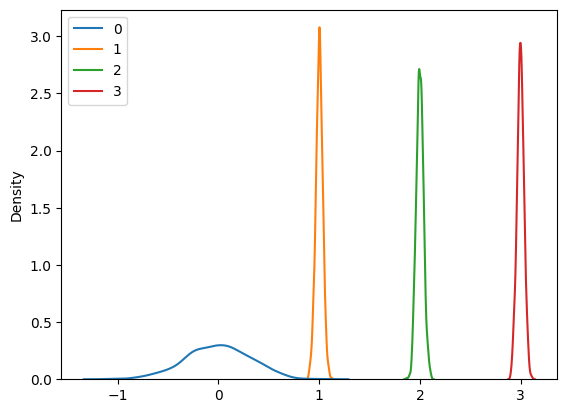

In [19]:
# TODO: your code goes here
sns.kdeplot(np.array(all_coefs),legend=["const","X1","X2","X3"])

<br>
<mark style="background-color: #648fff;">Question:</mark> What kind of distributions are these?

They are normal distribution

<br>
<mark style="background-color: #648fff;">Question:</mark> Why does the distribution for the coefficient of $X_0$ have larger variance?

Because as we said it is misinterpretated with the mean of the normal noise

<br>
<mark style="background-color: #40E0D0;"> Task </mark> 

Now, make the following plot to visualize the confidence intervals resulting from the 1000 models.

For each variable $X_j \in $(`X0, ..., X3`):

- Using [`plt.hlines`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hlines.html) plot each $\alpha = 0.95$ interval as a horizontal line, extending from its lower to upper limits. The line should be drawn at height `y=i`, where `i` is the index of the model (out of the 1000 fitted above).
- Using [`plt.vlines`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.vlines.html), draw a vertical line (e.g., in red), at the value of the true coefficient $\beta_j$ for that variable.

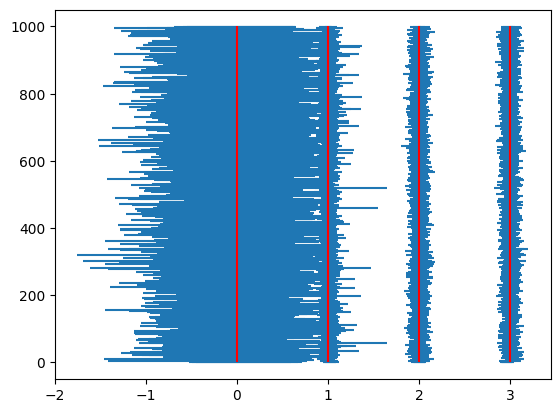

In [61]:
# TODO: your code goes here

XS=np.array([np.array([all_cis[i].loc[lab] for i in range(1000)]) for lab in ["X0","X1","X2","X3"]])

for v in range(4):
    Xi=XS[v]
    Xit=Xi.transpose()
    plt.hlines(range(1000),Xit[0],Xit[1] )
    plt.vlines(true_coefficients[v],0,1000,color="red")

<br>


<mark style="background-color: #648fff;">Question:</mark> Now, make a guess: for the resulting confidence intervals, what precentage do you think contain the true coefficients $\beta_0, \ldots, \beta_3$. Will this percentage be the same for all coefficients? 

For the variable $X_1,X_2,X_3$ will be around  99%, while for $X1$ all.

<br>
<mark style="background-color: #40E0D0;"> Task </mark>

Now, for each variable ($X_0, X_1, X_2, X_3$), compute how often the true coefficient falls inside the corresponding confidence interval (i.e., give a percentage).

In [112]:
# TODO: your code goes here


for v in range(4):
    coef=true_coefficients[v]
    Xi=XS[v]
    outside=sum((coef<Xi[:,0]) | (coef>Xi[:,1]))
    inside= sum((coef>Xi[:,0]) & (coef<Xi[:,1]))
    print(inside/10,outside/10)

95.6 4.4
95.1 4.9
94.5 5.5
94.9 5.1


<br>
<mark style="background-color: #648fff;">Question:</mark> Was your prediction correct? If not, what do you think is happening?

No, for all the variable is around 5%. The definition is the error of the single variable

Now, we will do the same, but this time we will count how often the coefficients of all variables _simultaneously_ fall inside their confidence intervals.

<mark style="background-color: #648fff;">Question:</mark>  Will the resulting percentage be higher, lower or the same (make a guess)? Try to explain your reasoning.

In [92]:
It will be lower, but not the product, becuse the value are correlated, so i think around 0.25%

SyntaxError: invalid syntax (2881167680.py, line 1)

<br>
<mark style="background-color: #40E0D0;"> Task </mark>

Now write the code to compute the simultaneous coverage percentage.

In [91]:
# TODO: your code goes here


all_out=[]

for v in range(4):
    coef=true_coefficients[v]
    Xi=XS[v]
    all_out.append(((coef<Xi[:,0]) | (coef>Xi[:,1])))

all_out=np.array(all_out)

all_wrong=(sum(all_out)==4)

print(sum(all_wrong))

0


<br>
<mark style="background-color: #648fff;">Question:</mark>  Were you right in your predicition? If not, what could be going wrong?

In [ ]:
It is 0, So the correlation is not strong between those varibale, so the probability is really that all the varaibles are wrong is lower than 0,1%.

## Understanding prediction intervals

We will now look at prediction intervals.

Given a DataFrame `new_covariates` containing observations of covariates (i.e., the predictors `X0, ..., X1`), you can compute the prediction intervals at level $alpha=0.05$ for each observation by calling:

In [100]:
new_covariates = fresh_data[['X0','X1', 'X2', 'X3']] # As a placeholder for this example
results.get_prediction(new_covariates).summary_frame(alpha=0.05)

NameError: name 'fresh_data' is not defined

The limits of the prediction interval are given by `obs_ci_lower` and `obs_ci_upper`.

<br>
<mark style="background-color: #40E0D0;"> Task </mark>

Generate a fresh dataset by calling `generate_dataset`. Pick a random seed that has not been selected before and set `N=1000`. Then compute the prediction intervals for each observation following the example above.

In [103]:
# TODO: your code goes here

generate_dataset(1000,1223)

X = data[['X0', 'X1', 'X2', 'X3']]
Y = data['Y']
X = sm.add_constant(X)

results=sm.OLS(Y,X).fit()

new_covariates = data[['X0','X1', 'X2', 'X3']] 

pred=results.get_prediction(new_covariates).summary_frame(alpha=0.05)

<br>
<mark style="background-color: #648fff;">Question:</mark> Now, make a guess. What percentage of the measured outcomes ($Y$) will be contained inside their prediction interval?

I think 5% as before

<br>
<mark style="background-color: #40E0D0;"> Task </mark>

Compute the actual percentage and print it.

In [109]:
# TODO: your code goes here

outside = ((data['Y'] < pred['obs_ci_lower']) |
          (data['Y'] > pred['obs_ci_upper']))

print(sum(outside)/len(outside)*100)

3.0


<br>
<mark style="background-color: #648fff;">Question:</mark> Was your hypothesis correct? If not, what is going wrong (make a guess).

In [111]:
It is 3%, so it is close to to my guess.

SyntaxError: invalid syntax (1619165410.py, line 1)